## 1. Clone the repo

In [1]:
!git clone https://github.com/MichielTaw/QuickMotif.git

Cloning into 'QuickMotif'...
remote: Enumerating objects: 64, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 64 (delta 22), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (64/64), 517.19 KiB | 6.31 MiB/s, done.
Resolving deltas: 100% (22/22), done.


## 2.Import Quickmotif

In [4]:
import QuickMotif
from QuickMotif.src.fasta import Fasta
from QuickMotif.src.helper import generate_k_random, random_sequence_generator, update_k_mers
from QuickMotif.src.matrix import Matrix
from QuickMotif.src.sequence import Sequence


## 3.Read Fasta file and Parse it

In [6]:
fasta_path = "motifk20.fasta" ; print(f'the fasta file path: {fasta_path}')
dna = Fasta(fasta_path)
number_of_dna = dna.count(">");  print(f'the number of DNA: {number_of_dna}')
frequency_nucleotides = dna.nucleotide_frequencies() ; print(f'frequency of nucleotides: {frequency_nucleotides}')

the fasta file path: motifk20.fasta
the number of DNA: 100
frequency of nucleotides: {'A': 0.26730294107692826, 'C': 0.247210658724518, 'G': 0.2633544296657303, 'T': 0.2221319705328234}


In [7]:
#Parsing DNA
parsed_dna = dna.parse()
print("Fasta is parsed at : parsed_dna")
print(f'the first sequence of the parsed fasta: {parsed_dna[1]}')

Fasta is parsed at : parsed_dna
the first sequence of the parsed fasta: ATGCGTTATATTCGCCTGTGTATTATCTCCCTGTTAGCCGCCCTGCCGCTGGCGGTACACGCCAGCCCGCAGCCGCTTGAGCAAATTAAACAAAGCGAAAGCCAGCTGTCGGGCCGCGTAGGCATGATAGAAATGGATCTGGCCAGCGGCCGCACGCTGACCGCCTGGCGCGCCGATGAACGCTTTCCCATGATAAGCACCTTTAAAGTAGTGCTCTGCGGCGCAGTGCTGGCGCGGGTGGATGCCGGTGACGAACAGCTGGAGCGAAAGATCCACTATCGCCAGCAGGATCTGGTGGACTACTCGCCGGTCAGCGAAAAAAAAAACCCCCAAAAAAAAACACCTTGCCGACGGCATGACGGTCGGCGAACTCTGTGCCGCCGCCATTACCATGAGCGATAACAGCGCCGCCAATTTGCTGCTGGCCATCGTCGGCGGCCCCGCAGGATTGACTGCCTTTTTGCGCCAGATCGGCGACAACGTCACCCGCCTTGACCGCTGGGAAACGGAACTGAATGAGGCGCTTCCCGGCGACGCCCGCGACACCACTACCCCGGCCAGCATGGCCGCGACCCTGCGCAAGCTGCTGACCAGCCAGCGTCTGAGCGCCCGTTCGCAACGGCAGCTGCTGCAGTGGATGGTGGACGATCGGGTCGCCGGACCGTTGATCCGCTCCGTGCTGCCGGCGGGCTGGTTTATCGCCGATAAGACCGGAGCTGGCGAACGGGGTGCGCGCGGGATTGTCGCCCTGCTTGGCCCGAATAACAAAGCAGAGCGCATTGTAGTGATTTATCTGCGGGATACCCCGGCGAGCATGGCCGAGCGAAATCAGCAAATCGCCGGGATCGGCGCGGCGCTGATCGAGCACTGGCAACGCTAA


## generate random sequences

In [8]:
indice, random_seq = random_sequence_generator(parsed_dna)
print(f'the type of indice :{type(indice)} and the type of the random sequence generated : {type(random_seq)}')
print(f'the index of the random sequence is {indice}')
print(f' the random sequence generated is the follows:{random_seq}')

the type of indice :<class 'int'> and the type of the random sequence generated : <class 'Bio.Seq.Seq'>
the index of the random sequence is 37
 the random sequence generated is the follows:ATGATGAAAAAATCGTTATGCTGCGCGCTGCTGCTGACAGCCTCTTTCTCCACGTTTGCTGCCGCAAAAACAGAACAACAAATTGCCGATATCGTTAACCGCACCATCACACCACTGATGCAGGAGCAGGCTATTCCGGGCATGGCCGTGGCAATTATCTACGAGGGGAAACCTTATTACTTTACCTGGGGTAAAGCCGATATCGCCAATAACCACCCAGTCACGCAGCAAACGCTGTTTGAGTTAGGGTCGGTCAGTAAGACGTTTAACGGCGTGTTGGGCGGCGACGCTATCGCCCGCGGCGAAATTAAGCTCAGCGATCCGGTCACGAAATACTGGCCAGAACTGACAGGCAAACAGTGGCGGGGTATCAGCCTGCTGCACTTAGCCACCTATACAGCGGGTGGCCTGCCGCTGCAGATCCCCGATTACGTTACGGATAAAGCCGAATTACTGCGCTTTTATCAAAACTGGCAACCACAATGGACTCCGGGCGCTAAGCGTCTTTACGCTAACTCCAGCATTGGTCTGTTTGGTGCGCTGGTGGTAAAACCTTCAGGTATGAGCTACGAAGAGGCAATGACCAGACGCGTCCTGCAACCATTAAAACTGGCGCATACCTGGATTACGGTTCCGCAAAGCGAACAAAAAAATTATGCCTGGGGCTATCGCGAAGGGAAGCCTGTACACGTTTCTCCGGGACAACTTGACGCCGAAGCCTATGGCGTGAAATCCAGCGTTATCGATATGGCCCGCTGGGTTCAGGCCAACATGGACGCCAGCCACGTTCAGGAGAAAACGCTCCAGCAGG

## Generate k-mers:

In [9]:
k_mers_motif = generate_k_random(parsed_dna, 20, 1)  
print(f'number ok k-mers: {len(k_mers_motif)} of length: {len(k_mers_motif[0])}')
print(f'the type of k_mers : {type(k_mers_motif)}')
print(f'the first 3 k_mers :{k_mers_motif[0:3]}')

number ok k-mers: 100 of length: 20
the type of k_mers : <class 'list'>
the first 3 k_mers :[Seq('GAAAGGTATGTTGCCAGCCA'), Seq('AATTAAACAAAGCGAAAGCC'), Seq('CCCAAAAAAAAAGTCATCCG')]


## Generate PFM and PWM

the type of the PWM:<class 'numpy.ndarray'>
the position weight matrix is the following:
[[0.25 0.29 0.23 0.21 0.37 0.25 0.34 0.32 0.27 0.25 0.31 0.33 0.24 0.18
  0.31 0.24 0.25 0.27 0.22 0.28]
 [0.31 0.19 0.23 0.34 0.16 0.25 0.22 0.2  0.27 0.24 0.2  0.19 0.29 0.27
  0.32 0.25 0.23 0.45 0.32 0.27]
 [0.28 0.33 0.28 0.21 0.33 0.27 0.26 0.24 0.23 0.25 0.22 0.23 0.21 0.33
  0.19 0.25 0.3  0.19 0.26 0.28]
 [0.15 0.18 0.25 0.23 0.13 0.22 0.17 0.23 0.22 0.25 0.26 0.24 0.25 0.21
  0.17 0.25 0.21 0.08 0.19 0.16]]


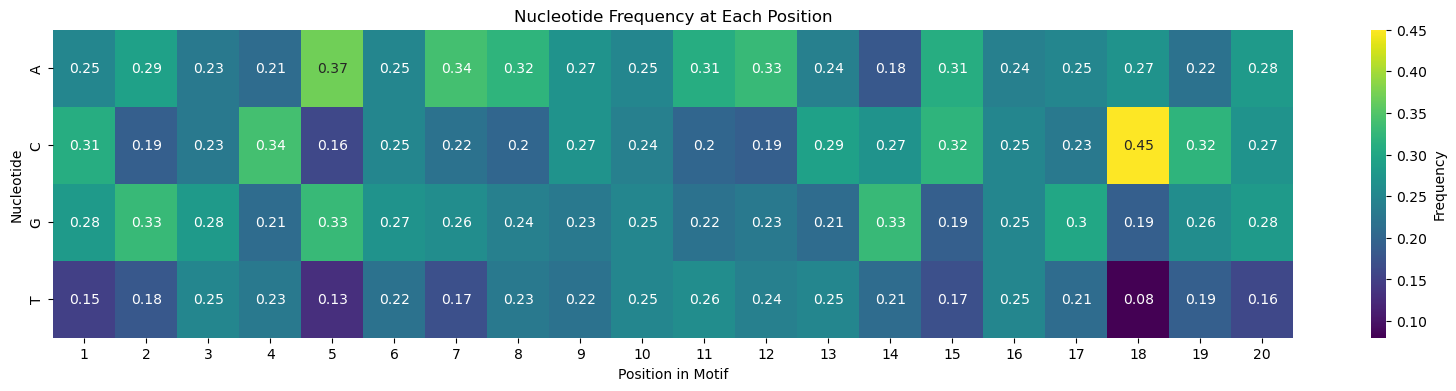

In [12]:
matrice = Matrix(k_mers_motif)
pfm  = matrice.PFM(indice)
print(f'the type of the PWM:{type(pfm)}')
print(f'the position weight matrix is the following:')
print(pfm)
matrice.PlotMatrix(pfm)

[[ 5.77076862e-06  2.14129780e-01 -1.20287961e-01 -2.51531897e-01
   5.65601075e-01  5.77076862e-06  4.43610895e-01  3.56148319e-01
   1.11036656e-01  5.77076862e-06  3.10344774e-01  4.00542301e-01
  -5.88876778e-02 -4.73923173e-01  3.10344774e-01 -5.88876778e-02
   5.77076862e-06  1.11036656e-01 -1.84418013e-01  1.63503885e-01]
 [ 3.10344774e-01 -3.95921083e-01 -1.20287961e-01  4.43610895e-01
  -6.43847173e-01  5.77076862e-06 -1.84418013e-01 -3.21920881e-01
   1.11036656e-01 -5.88876778e-02 -3.21920881e-01 -3.95921083e-01
   2.14129780e-01  1.11036656e-01  3.56148319e-01  5.77076862e-06
  -1.20287961e-01  8.48000113e-01  3.56148319e-01  1.11036656e-01]
 [ 1.63503885e-01  4.00542301e-01  1.63503885e-01 -2.51531897e-01
   4.00542301e-01  1.11036656e-01  5.65890772e-02 -5.88876778e-02
  -1.20287961e-01  5.77076862e-06 -1.84418013e-01 -1.20287961e-01
  -2.51531897e-01  4.00542301e-01 -3.95921083e-01  5.77076862e-06
   2.63039215e-01 -3.95921083e-01  5.65890772e-02  1.63503885e-01]
 [-7.36

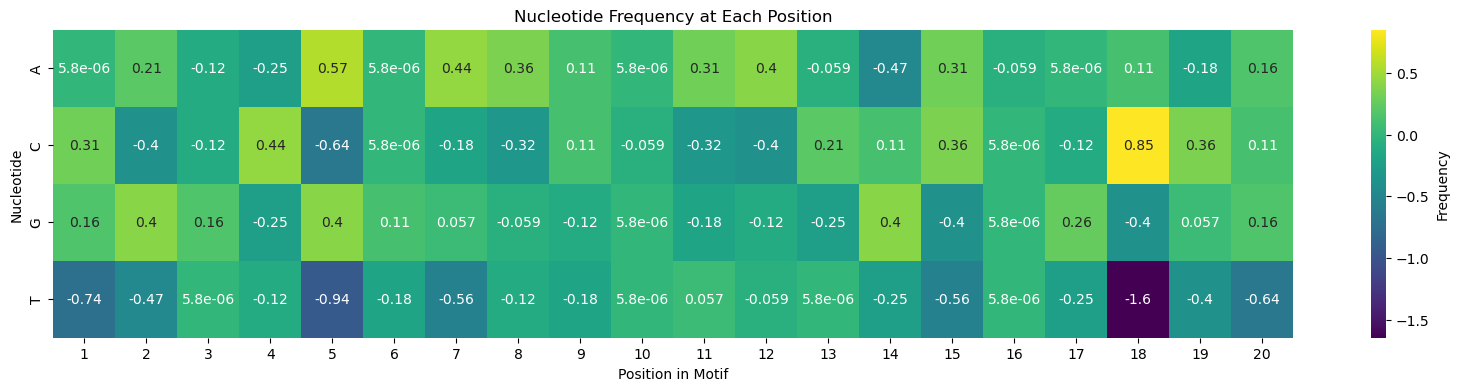

In [13]:
pwm = matrice.PWM(indice)
print(pwm)
matrice.PlotMatrix(pwm)

In [11]:
seq = Sequence(random_seq)
scores= seq.ScoreSequence(pwm)
new_motif = seq.generate_kmer(pwm)
print(new_motif)

CGAACAAAAAAATTATGCCT


## Gibbs sampling

In [14]:
def loop(fasta_path , k_mer , sample_per_sequence, num_iterations):
    dna = Fasta(fasta_path)
    parsed_dna = dna.parse()
    k_mers_motif = generate_k_random(parsed_dna, k_mer, sample_per_sequence) 
    matrice = Matrix(k_mers_motif)
    indice, random_seq = random_sequence_generator(parsed_dna)
    seq = Sequence(random_seq)
    pwm = matrice.PWM(indice)
    scores= seq.ScoreSequence(pwm)
    new_motif = seq.generate_kmer(pwm)
    update_k_mers(k_mers_motif, indice, new_motif)
    for i in range(num_iterations):
        matrice = Matrix(k_mers_motif)
        indice, random_seq = random_sequence_generator(parsed_dna)
        seq = Sequence(random_seq)
        pwm = matrice.PWM(indice)
        scores= seq.ScoreSequence(pwm)
        new_motif = seq.generate_kmer(pwm)
        update_k_mers(k_mers_motif, indice, new_motif)
    return matrice.PlotMatrix(pwm)

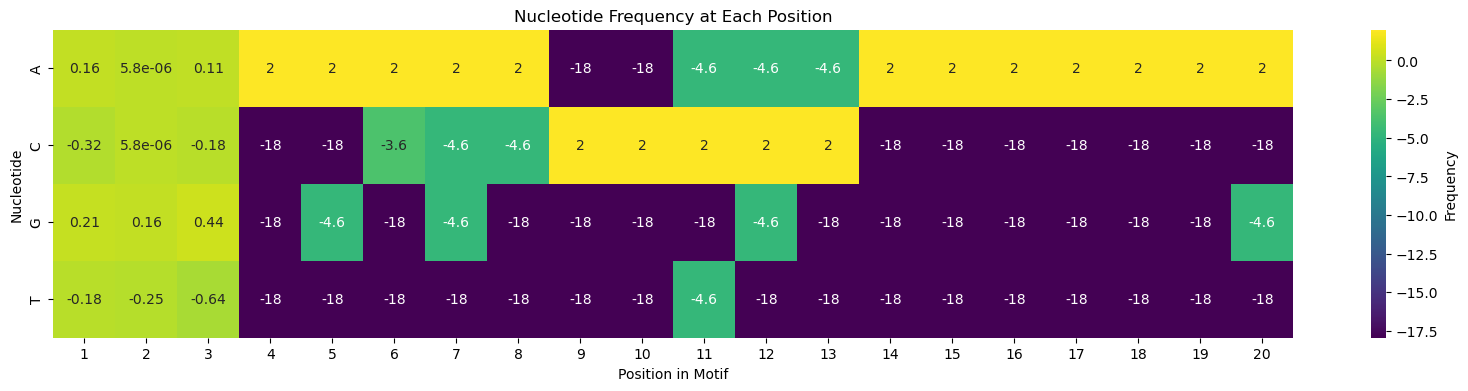

In [17]:
sampling = loop(fasta_path, 20, 1, 1000)